
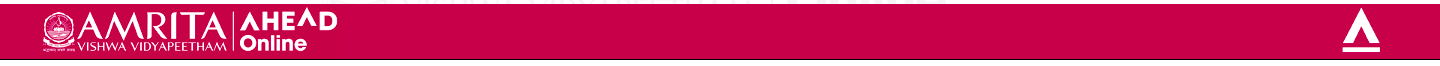

#Load Data

In [15]:
import pandas as pd
df = pd.read_csv('bbc_preprocessed.csv')
df.head()

,Unnamed: 0,category,text,category_id,clean_text
0,0,tech,tv future in the hands of viewers with home th...,0,tv futur hand viewer home theatr system plasma...
1,1,business,worldcom boss left books alone former worldc...,1,worldcom boss left book alon former worldcom b...
2,2,sport,tigers wary of farrell gamble leicester say ...,2,tiger wari farrel gambl leicest say rush make ...
3,3,sport,yeading face newcastle in fa cup premiership s...,2,yead face newcastl fa cup premiership side new...
4,4,entertainment,ocean s twelve raids box office ocean s twelve...,3,ocean twelv raid box offic ocean twelv crime c...


In [16]:
df.shape

(2225, 5)

In [17]:
print(df.category_id.unique(),df.category.unique())

[0 1 2 3 4] ['tech' 'business' 'sport' 'entertainment' 'politics']


#Vectorize

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

texts = df['clean_text']

tfidf_vectorizer = TfidfVectorizer()

X = tfidf_vectorizer.fit_transform(texts) #features
y = df['category_id'].values #target

print (X.shape)
print(y.shape)

(2225, 18541)
(2225,)


#Create Model
training set and test set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size = .3, shuffle = True, stratify = y,random_state = 3)

https://scikit-learn.org/stable/modules/naive_bayes.html

MultinomialNB:

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [22]:
from pickle import dump
dump(mnb, open('mnb_model.pkl', 'wb'))

#Evaluate the model

In [23]:
predicted = mnb.predict(X_test)

In [24]:
mnb.score(X_test,y_test)

0.9730538922155688

In [25]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=y_test, y_pred=predicted)
confusion

array([[117,   1,   1,   0,   1],
       [  2, 150,   0,   0,   1],
       [  0,   0, 154,   0,   0],
       [  3,   3,   0, 106,   4],
       [  0,   1,   1,   0, 123]], dtype=int64)

G:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


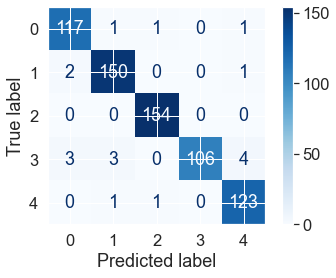

In [26]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

sn.set(font_scale=1.5) # for label size

plot_confusion_matrix(mnb, X_test, y_test,cmap=plt.cm.Blues,values_format='1')
plt.show()

#Checking with new instance

In [2]:
%run preprocess.ipynb

In [3]:
from pickle import load

tfidf_vectorizer = load(open('tfidf.pkl', 'rb'))
mnb = load(open('mnb_model.pkl', 'rb'))

In [4]:
new_news = 'blair prepares to name poll date tony blair '
new_news = preprocess1(new_news)
vec = tfidf_vectorizer.transform([new_news])
y_predict = mnb.predict(vec)

In [5]:
type(tfidf_vectorizer)

sklearn.feature_extraction.text.TfidfVectorizer

In [6]:
classes = {0:'tech',1:'business',2:'sport',3:'entertainment',4:'politics'}
classes[y_predict[0]]

'politics'

Natural Language Processing - Lab Manual
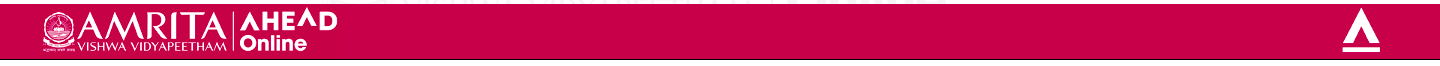